<H1> Heart Attack Nigeria Youth vs Adult <H1>

<H2> Importing Libraries and reading the data. <H2>

In [14]:
import pandas as pd 
import numpy as np 


In [15]:
df=pd.read_csv(r"C:\Users\Dell\Desktop\Correlation one\heart_attack_nigeria_youth_vs_adult.csv")

In [16]:
pd.set_option('display.max_columns', None)
df

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Family_History,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Sleep_Hours,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,41,Female,Rural,141.4,182.9,37.4,92,Moderate,False,NaN,False,False,4,False,False,False,Unhealthy,5.2,Student,Low,Low,Primary,Single,Urban,False,3,1.3,3,True
1,2,54,Male,Rural,130.4,252.4,17.9,81,Moderate,False,Moderate,False,False,10,True,True,False,Healthy,5.8,Unemployed,Low,Moderate,Higher,Divorced,Rural,False,1,0.9,8,False
2,3,24,Male,Urban,144.8,142.5,31.6,71,Low,True,NaN,False,False,8,False,False,False,Healthy,8.8,Employed,High,Low,Primary,Married,Rural,True,3,2.2,5,False
3,4,59,Female,Suburban,163.1,312.4,11.4,67,Moderate,False,Moderate,True,True,1,False,False,True,Healthy,7.5,Employed,Low,Moderate,Secondary,Divorced,Rural,True,5,3.5,10,False
4,5,20,Male,Urban,120.7,298.4,29.3,90,High,True,Heavy,True,True,6,False,False,False,Healthy,7.4,Student,Low,Low,Secondary,Married,Urban,True,4,2.3,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,48,Male,Urban,131.8,165.1,22.6,96,Low,False,NaN,False,True,3,False,False,False,Unhealthy,7.5,Employed,Low,Low,Higher,Married,Rural,False,1,1.2,7,False
49996,49997,36,Male,Rural,137.8,204.0,20.7,70,Moderate,False,NaN,False,False,2,False,False,False,Unhealthy,7.1,Student,Low,Moderate,Higher,Married,Rural,False,3,1.4,2,True
49997,49998,27,Female,Rural,149.3,180.6,31.3,85,Moderate,False,NaN,False,False,2,False,False,False,Mixed,5.6,Student,Middle,Moderate,Primary,Divorced,Rural,False,5,4.0,6,False
49998,49999,17,Female,Rural,127.2,206.3,25.9,77,Moderate,False,Moderate,False,False,7,False,False,False,Mixed,6.4,Student,Low,Moderate,Primary,Married,Rural,False,3,2.3,10,False


<h2> Selecting the columns to work with <h2>

In [17]:
df.drop(["ID", "Region", "Income_Level", "Education_Level", 
         "Marital_Status", "Sleep_Hours", "Daily_Water_Intake",
         "Mental_Health","Family_History"], axis=1, inplace=True)


<h2> Checking for data types and Null values <h2>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Blood_Pressure         50000 non-null  float64
 3   Cholesterol            50000 non-null  float64
 4   BMI                    50000 non-null  float64
 5   Heart_Rate             50000 non-null  int64  
 6   Exercise_Level         50000 non-null  object 
 7   Smoking                50000 non-null  bool   
 8   Alcohol_Consumption    14930 non-null  object 
 9   Diabetes               50000 non-null  bool   
 10  Stress_Level           50000 non-null  int64  
 11  Heart_Attack           50000 non-null  bool   
 12  Angina                 50000 non-null  bool   
 13  Heart_Disease_History  50000 non-null  bool   
 14  Diet                   50000 non-null  object 
 15  Oc

In [19]:
# The null values in Alcohol Consumption columns are "None" meaning the patients doesnt consume alcohol
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna('None')


In [20]:
#Checking the attributes unique values to ensure consistency.
df1 = pd.DataFrame(df[["Age","Gender","Smoking","Alcohol_Consumption","Diabetes","Heart_Attack","Angina","Heart_Disease_History","Diet","Occupation","Physical_Activity","Urban_Rural","Medication","Obesity"]])
unique_values_per_column = df1.apply(pd.Series.unique)
print(unique_values_per_column)

Age                      [41, 54, 24, 59, 20, 25, 46, 36, 33, 30, 22, 1...
Gender                                               [Female, Male, Other]
Smoking                                                      [False, True]
Alcohol_Consumption                                [None, Moderate, Heavy]
Diabetes                                                     [False, True]
Heart_Attack                                                 [False, True]
Angina                                                       [False, True]
Heart_Disease_History                                        [False, True]
Diet                                           [Unhealthy, Healthy, Mixed]
Occupation                        [Student, Unemployed, Employed, Retired]
Physical_Activity                                    [Low, Moderate, High]
Urban_Rural                                                 [Urban, Rural]
Medication                                                   [False, True]
Obesity                  

<h2> Checking fot Duplicates <h2>

In [21]:
duplicates=df.duplicated()


In [22]:
duplicated_rows=df[duplicates]
duplicated_rows  # No duplicates

,Age,Gender,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Occupation,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Obesity


In [23]:
df.reset_index(drop=True, inplace=True)
df

,Age,Gender,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Occupation,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Obesity
0,41,Female,141.4,182.9,37.4,92,Moderate,False,None,False,4,False,False,False,Unhealthy,Student,Low,Urban,False,3,True
1,54,Male,130.4,252.4,17.9,81,Moderate,False,Moderate,False,10,True,True,False,Healthy,Unemployed,Moderate,Rural,False,1,False
2,24,Male,144.8,142.5,31.6,71,Low,True,None,False,8,False,False,False,Healthy,Employed,Low,Rural,True,3,False
3,59,Female,163.1,312.4,11.4,67,Moderate,False,Moderate,True,1,False,False,True,Healthy,Employed,Moderate,Rural,True,5,False
4,20,Male,120.7,298.4,29.3,90,High,True,Heavy,True,6,False,False,False,Healthy,Student,Low,Urban,True,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,48,Male,131.8,165.1,22.6,96,Low,False,None,False,3,False,False,False,Unhealthy,Employed,Low,Rural,False,1,False
49996,36,Male,137.8,204.0,20.7,70,Moderate,False,None,False,2,False,False,False,Unhealthy,Student,Moderate,Rural,False,3,True
49997,27,Female,149.3,180.6,31.3,85,Moderate,False,None,False,2,False,False,False,Mixed,Student,Moderate,Rural,False,5,False
49998,17,Female,127.2,206.3,25.9,77,Moderate,False,Moderate,False,7,False,False,False,Mixed,Student,Moderate,Rural,False,3,False


<h2> Summary Statistics <h2>

In [24]:
df.describe() 

,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Stress_Level,Health_Awareness
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,36.020400,124.730312,209.601122,26.976694,84.504340,5.516740,2.998820
std,14.191716,17.987423,60.128478,6.001402,11.513936,2.873097,1.414121
min,12.000000,51.500000,-26.800000,0.500000,65.000000,1.000000,1.000000
25%,24.000000,112.700000,168.900000,23.000000,75.000000,3.000000,2.000000
50%,36.000000,124.700000,209.600000,27.000000,85.000000,6.000000,3.000000
75%,48.000000,136.900000,250.000000,31.000000,94.000000,8.000000,4.000000
max,60.000000,202.400000,437.600000,53.200000,104.000000,10.000000,5.000000


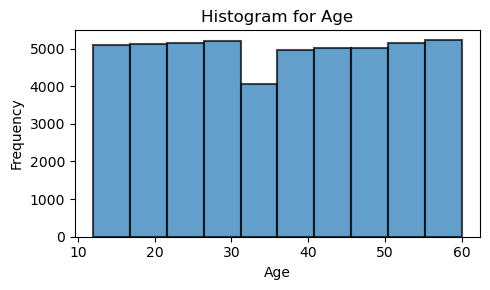

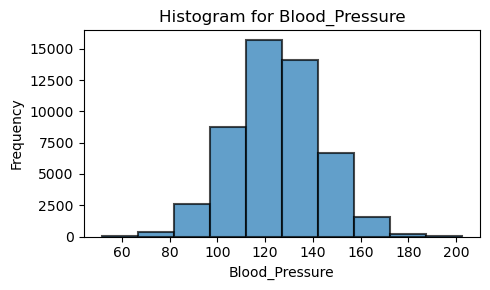

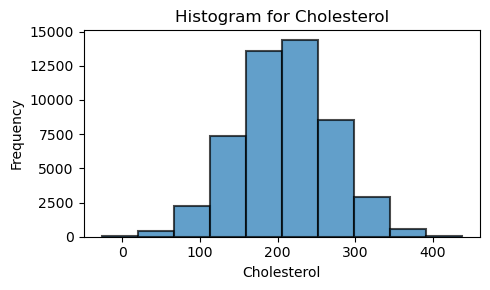

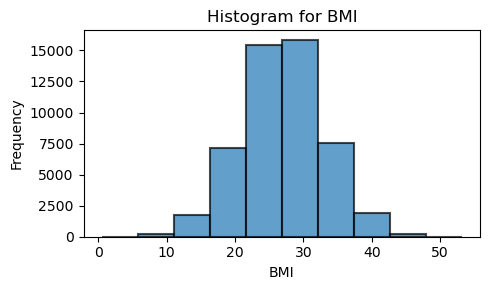

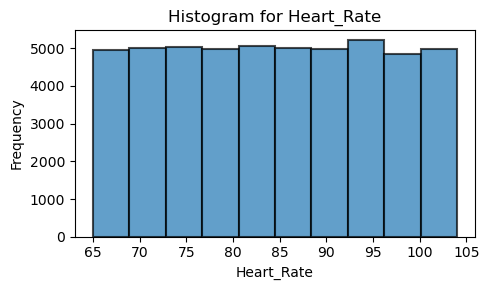

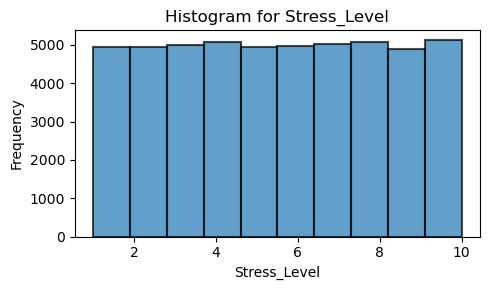

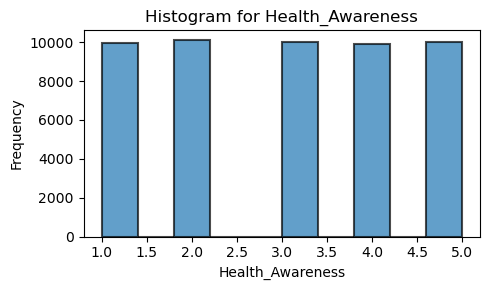

In [25]:
import matplotlib.pyplot as plt
df3=df[["Age","Blood_Pressure","Cholesterol","BMI","Heart_Rate","Stress_Level","Health_Awareness"]]

for column in df3.columns:
    plt.figure(figsize=(5, 3))  # Smaller figure size
    plt.hist(df[column], bins=10, edgecolor='black', histtype='bar', linewidth=1.5, alpha=0.7)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Prevent overlap
    plt.show()

<h3> We notice there is something wrong with cholesterol values , this value can't be negative , the minimum cholesterol value is 80mg/mMol <h3>
    

In [26]:
df.loc[df["Cholesterol"] < 80, "Cholesterol"] = 0
#Set the values less than 80 to be zero , to use them in the predictive model

In [27]:
df[df["Cholesterol"]<80]

,Age,Gender,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Occupation,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Obesity
149,53,Male,163.1,0.0,28.7,97,Moderate,False,None,False,9,False,False,False,Healthy,Unemployed,Low,Urban,False,4,False
177,50,Female,133.8,0.0,25.6,96,Low,False,None,False,10,False,False,False,Mixed,Unemployed,Moderate,Rural,True,2,True
361,47,Female,106.6,0.0,33.0,98,Low,True,None,False,2,False,False,False,Healthy,Employed,Low,Rural,False,3,True
376,13,Male,101.1,0.0,22.4,88,Low,False,None,False,4,False,False,False,Healthy,Employed,Moderate,Rural,True,2,True
471,34,Male,130.1,0.0,28.8,97,Low,False,None,False,7,False,True,False,Healthy,Retired,Moderate,Rural,False,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49647,29,Female,118.9,0.0,38.4,103,Low,False,None,True,3,False,False,False,Mixed,Student,Moderate,Rural,True,5,False
49702,21,Female,122.8,0.0,27.2,98,Moderate,True,None,False,1,False,False,False,Mixed,Student,Low,Urban,False,5,True
49836,43,Male,131.4,0.0,27.7,93,Moderate,False,None,True,3,False,False,False,Healthy,Employed,Moderate,Urban,True,4,False
49932,33,Female,107.7,0.0,27.7,89,Low,False,None,False,3,False,False,True,Mixed,Employed,Low,Rural,False,5,False


In [28]:
#Finding the correlation between Cholestrol and other variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Diet_encoded'] = label_encoder.fit_transform(df['Diet'])
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Physical_Activity_encoded'] = label_encoder.fit_transform(df['Physical_Activity'])

columns = ["Age", "Gender_encoded", "Blood_Pressure", "BMI", "Smoking", "Diabetes", 
           "Stress_Level", "Heart_Disease_History", "Diet_encoded", 
           "Physical_Activity_encoded", "Obesity"]
corr_with_target = df[columns].corrwith(df['Cholesterol'])
print(corr_with_target)


Age                          0.005365
Gender_encoded              -0.002115
Blood_Pressure               0.008338
BMI                          0.000472
Smoking                      0.000592
Diabetes                    -0.002208
Stress_Level                 0.000828
Heart_Disease_History        0.005426
Diet_encoded                -0.001914
Physical_Activity_encoded   -0.000251
Obesity                      0.007248
dtype: float64


In [29]:
df.drop(df[["Diet_encoded","Gender_encoded","Physical_Activity_encoded" ]], axis=1,inplace=True)


<h4> since the correlation between cholesterol and other variables is very weak , it is not effeicient to use them to predict the incorrect values ,so the best practice would be to delete them.
    The percentage of the rows to be deleted is less than 5% o the total data.<h4>

In [30]:
df.drop(df[df["Cholesterol"] == 0].index, axis=0,inplace=True)

In [31]:
df[df["Cholesterol"]==0]

,Age,Gender,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Occupation,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Obesity


In [32]:
df.reset_index(drop=True, inplace=True)
df

,Age,Gender,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Occupation,Physical_Activity,Urban_Rural,Medication,Health_Awareness,Obesity
0,41,Female,141.4,182.9,37.4,92,Moderate,False,None,False,4,False,False,False,Unhealthy,Student,Low,Urban,False,3,True
1,54,Male,130.4,252.4,17.9,81,Moderate,False,Moderate,False,10,True,True,False,Healthy,Unemployed,Moderate,Rural,False,1,False
2,24,Male,144.8,142.5,31.6,71,Low,True,None,False,8,False,False,False,Healthy,Employed,Low,Rural,True,3,False
3,59,Female,163.1,312.4,11.4,67,Moderate,False,Moderate,True,1,False,False,True,Healthy,Employed,Moderate,Rural,True,5,False
4,20,Male,120.7,298.4,29.3,90,High,True,Heavy,True,6,False,False,False,Healthy,Student,Low,Urban,True,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49209,48,Male,131.8,165.1,22.6,96,Low,False,None,False,3,False,False,False,Unhealthy,Employed,Low,Rural,False,1,False
49210,36,Male,137.8,204.0,20.7,70,Moderate,False,None,False,2,False,False,False,Unhealthy,Student,Moderate,Rural,False,3,True
49211,27,Female,149.3,180.6,31.3,85,Moderate,False,None,False,2,False,False,False,Mixed,Student,Moderate,Rural,False,5,False
49212,17,Female,127.2,206.3,25.9,77,Moderate,False,Moderate,False,7,False,False,False,Mixed,Student,Moderate,Rural,False,3,False


In [33]:
df.rename(columns={'Urban_Rural': 'Region'}, inplace=True)


In [34]:
#Encoding some variables that we are going to use in our final dashboard
df['Smoking'] = label_encoder.fit_transform(df['Smoking'])
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])
df['Heart_Attack'] = label_encoder.fit_transform(df['Heart_Attack'])
df['Angina'] = label_encoder.fit_transform(df['Angina'])
df['Heart_Disease_History'] = label_encoder.fit_transform(df['Heart_Disease_History'])
df['Medication'] = label_encoder.fit_transform(df['Medication'])
df['Obesity'] = label_encoder.fit_transform(df['Obesity'])


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49214 entries, 0 to 49213
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    49214 non-null  int64  
 1   Gender                 49214 non-null  object 
 2   Blood_Pressure         49214 non-null  float64
 3   Cholesterol            49214 non-null  float64
 4   BMI                    49214 non-null  float64
 5   Heart_Rate             49214 non-null  int64  
 6   Exercise_Level         49214 non-null  object 
 7   Smoking                49214 non-null  int64  
 8   Alcohol_Consumption    49214 non-null  object 
 9   Diabetes               49214 non-null  int64  
 10  Stress_Level           49214 non-null  int64  
 11  Heart_Attack           49214 non-null  int64  
 12  Angina                 49214 non-null  int64  
 13  Heart_Disease_History  49214 non-null  int64  
 14  Diet                   49214 non-null  object 
 15  Oc

In [36]:
df

,Age,Gender,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Alcohol_Consumption,Diabetes,Stress_Level,Heart_Attack,Angina,Heart_Disease_History,Diet,Occupation,Physical_Activity,Region,Medication,Health_Awareness,Obesity
0,41,Female,141.4,182.9,37.4,92,Moderate,0,None,0,4,0,0,0,Unhealthy,Student,Low,Urban,0,3,1
1,54,Male,130.4,252.4,17.9,81,Moderate,0,Moderate,0,10,1,1,0,Healthy,Unemployed,Moderate,Rural,0,1,0
2,24,Male,144.8,142.5,31.6,71,Low,1,None,0,8,0,0,0,Healthy,Employed,Low,Rural,1,3,0
3,59,Female,163.1,312.4,11.4,67,Moderate,0,Moderate,1,1,0,0,1,Healthy,Employed,Moderate,Rural,1,5,0
4,20,Male,120.7,298.4,29.3,90,High,1,Heavy,1,6,0,0,0,Healthy,Student,Low,Urban,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49209,48,Male,131.8,165.1,22.6,96,Low,0,None,0,3,0,0,0,Unhealthy,Employed,Low,Rural,0,1,0
49210,36,Male,137.8,204.0,20.7,70,Moderate,0,None,0,2,0,0,0,Unhealthy,Student,Moderate,Rural,0,3,1
49211,27,Female,149.3,180.6,31.3,85,Moderate,0,None,0,2,0,0,0,Mixed,Student,Moderate,Rural,0,5,0
49212,17,Female,127.2,206.3,25.9,77,Moderate,0,Moderate,0,7,0,0,0,Mixed,Student,Moderate,Rural,0,3,0


In [37]:
df.to_csv(r"C:\Users\Dell\Desktop\Correlation one\Data_cleand.csv")
